<a href="https://colab.research.google.com/github/snfruby/CS114.K21/blob/master/RunningTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://cs.uit.edu.vn/data.txt', names = ['size', 'time'])
data.head()

,size,time
0,4032139,1.200580
1,2055486,0.509774
2,5626651,1.476080
3,42065,0.007651
4,6297788,1.661560


In [3]:
data['size^2'] = data['size'] * data['size']
data['size*log(size)'] = data['size'] * np.log10(data['size'])
columns_title = ['size', 'size^2', 'size*log(size)', 'time']
data = data.reindex(columns = columns_title)
data.head()

,size,size^2,size*log(size),time
0,4032139,16258144915321,2.663444e+07,1.200580
1,2055486,4225022696196,1.297611e+07,0.509774
2,5626651,31659201475801,3.798130e+07,1.476080
3,42065,1769464225,1.945052e+05,0.007651
4,6297788,39662133692944,4.281984e+07,1.661560


In [0]:
from sklearn.model_selection import train_test_split
array = data.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
models =[]
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('LR', LinearRegression()))
models.append(('KNR', KNeighborsRegressor()))

r={}
for name, model in models:
  model.fit(X_train, y_train)
  val_pre = model.predict(X_validation)
  val_mae = mean_absolute_error(val_pre, y_validation)
  r[name]=val_mae
  print(name,":",val_mae)

DTR : 0.034486488830297216
RFR : 0.029042453070412057
LR : 0.022466738960920208
KNR : 0.025897384380057523


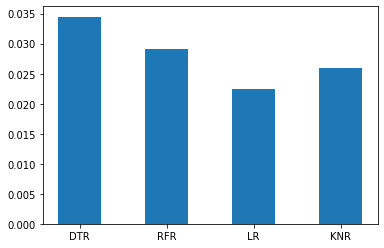

In [46]:
from matplotlib import pyplot
pyplot.bar(r.keys(), r.values(), width=0.5)
pyplot.show()